# PCA - *Principal Component Analysis*

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
from sklearn.datasets import load_wine

In [3]:
ds = load_wine(as_frame=True)

In [11]:
df = ds.frame
X = ds.data
y = ds.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [8]:
from sklearn.decomposition import PCA


In [9]:
pca = PCA(n_components=2)

In [12]:
pca.fit(X)

PCA(n_components=2)

In [14]:
X_pca = pca.transform(X)

In [15]:
X.shape, X_pca.shape

((178, 13), (178, 2))

In [16]:
df_pca = pd.DataFrame(X_pca, columns=["PC 0", "PC 1"])
df_pca

,PC 0,PC 1
0,318.562979,21.492131
1,303.097420,-5.364718
2,438.061133,-6.537309
3,733.240139,0.192729
4,-11.571428,18.489995
...,...,...
173,-6.980211,-4.541137
174,3.131605,2.335191
175,88.458074,18.776285
176,93.456242,18.670819


<Axes: xlabel='PC 0', ylabel='PC 1'>

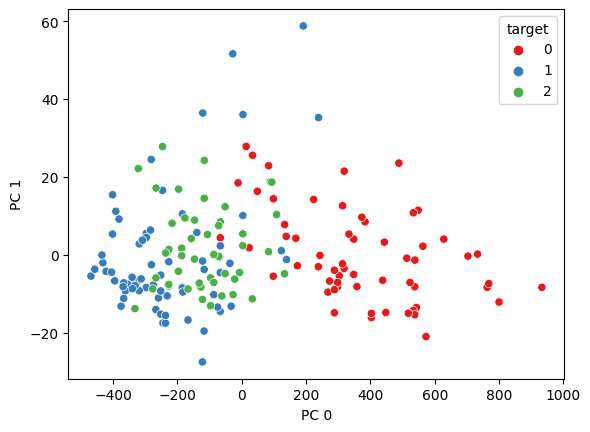

In [18]:
sns.set_palette("seismic")
sns.scatterplot(data=df_pca, x="PC 0", y="PC 1", hue=y, palette="Set1")

In [19]:
df.groupby("target").mean().T

target,0,1,2
alcohol,13.744746,12.278732,13.153750
malic_acid,2.010678,1.932676,3.333750
ash,2.455593,2.244789,2.437083
alcalinity_of_ash,17.037288,20.238028,21.416667
magnesium,106.338983,94.549296,99.312500
total_phenols,2.840169,2.258873,1.678750
flavanoids,2.982373,2.080845,0.781458
nonflavanoid_phenols,0.290000,0.363662,0.447500
proanthocyanins,1.899322,1.630282,1.153542
color_intensity,5.528305,3.086620,7.396250


In [20]:
pca.components_

array([[ 1.65926472e-03, -6.81015556e-04,  1.94905742e-04,
        -4.67130058e-03,  1.78680075e-02,  9.89829680e-04,
         1.56728830e-03, -1.23086662e-04,  6.00607792e-04,
         2.32714319e-03,  1.71380037e-04,  7.04931645e-04,
         9.99822937e-01],
       [ 1.20340617e-03,  2.15498184e-03,  4.59369254e-03,
         2.64503930e-02,  9.99344186e-01,  8.77962152e-04,
        -5.18507284e-05, -1.35447892e-03,  5.00440040e-03,
         1.51003530e-02, -7.62673115e-04, -3.49536431e-03,
        -1.77738095e-02]])

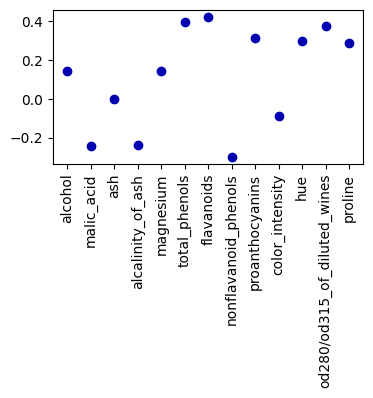

In [35]:
fig, ax = plt.subplots(1, figsize=(4,2))
ax.scatter(np.arange(len(X.columns)), pca.components_[0])
ax.set_xticks(np.arange(len(X.columns)))
ax.set_xticklabels(X.columns, rotation=90)
plt.show()

In [27]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler = StandardScaler()
scaler.fit(X)
Xs = scaler.transform(X)
Xs

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [32]:
pca = PCA(n_components=2)
pca.fit(Xs)
Xs_pca = pca.transform(Xs)


In [33]:
Xs_pca_df = pd.DataFrame(Xs_pca, columns=["PC 0", "PC 1"])
Xs_pca_df.head()

,PC 0,PC 1
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831


<Axes: xlabel='PC 0', ylabel='PC 1'>

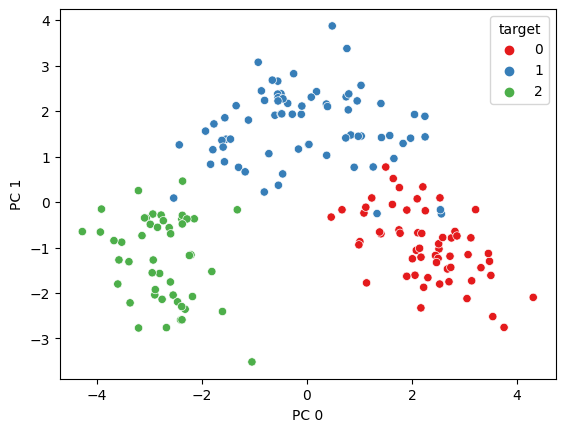

In [34]:
sns.scatterplot(data=Xs_pca_df, x="PC 0", y="PC 1", hue=y, palette="Set1")

In [37]:
pca.explained_variance_ratio_, sum(pca.explained_variance_ratio_)

(array([0.36198848, 0.1920749 ]), 0.554063383569353)

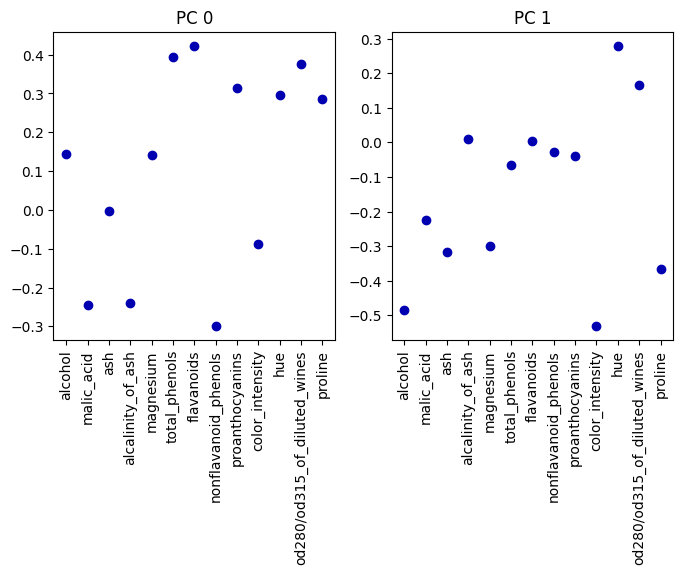

In [36]:
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(8,4))
for idx, pc in enumerate(pca.components_):
    ax[idx].scatter(np.arange(len(X.columns)), pc)
    ax[idx].set_xticks(np.arange(len(X.columns)))
    ax[idx].set_xticklabels(X.columns, rotation=90)
    ax[idx].set_title("PC %d" % (idx))
plt.show()